Como continuación de las actividades realizadas en los pasos 1, 2 y 3 del proyecto, mismas que se encuentran relacionadas con la preparación  y filtrado de datos a través de sentencias de SQL, y de las cuales se obtuvieron los archivos de datos que se asignarán a dataframe, con la finalidad de poder analizar, y presentar las pruebas de hipótesis necesarias, para demostrar "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Importando las librerías necesarias para trabajar con los datos correspondientes al servicio de taxis y destinos.

In [27]:
from scipy import stats as st
from scipy.stats import levene
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de los datos de estudio

Es este paso se realiza la carga de los datos a los respectivos dataframe, company_trips y dropoff, que servirán para realizar el estudio de los destinos y empresas de taxis.

In [28]:

company_trips = pd.read_csv('/datasets/project_sql_result_01.csv' , sep = ',')

dropoff = pd.read_csv('/datasets/project_sql_result_04.csv' , sep = ',')

loop_trips = pd.read_csv('/datasets/project_sql_result_07.csv' , sep = ',')

Se ejecuta el comando info para ambos dataframe para observar como se encuentran conformados:

In [29]:
print("Info del dataframe company_trips")
print()
company_trips.info()
print()
print("Info del dataframe dropoff")
print()
dropoff.info()
print()
print("Info del dataframe loop_trips")
print()
loop_trips.info()

Info del dataframe company_trips

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

Info del dataframe dropoff

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB

Info del dataframe loop_trips

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts      

Se imprime una pequeña muestra de los dataframe, a fin de consultar la información contenida:

In [30]:
print("Muestra de datos del dataframe company_trips")
print()
print(company_trips.head())
print()
print("Muestra de datos del dataframe dropoff")
print()
print(dropoff.head())
print()
print("Muestra de datos del dataframe loop_trips")
print()
print(loop_trips.head())

Muestra de datos del dataframe company_trips

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

Muestra de datos del dataframe dropoff

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000

Muestra de datos del dataframe loop_trips

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good

Observando la muestra de los dataframe company_trips y dropoff, podemos concluir que los tipos de datos que los conforman son correctos, toda vez que se muestra company_name como tipo objeto y trips_amount como entero; y por otro lado dropoff_location como tipo objeto y average_trips como flotante. En lo correspondiente al dataframe loop_trips, se realizó la modificación del tipo de dato del campo start_ts a timestamp, a fin de poder realizar cálculos con las fechas y horas. Adicionalmente  se modificó el campo duration_seconds de flotante a entero, ya que la unidad de medida utilizada son los segundos.

### Revisando si existen valores duplicados

In [31]:
duplicated_company_trips = company_trips.duplicated().sum()
print()
print("Número de registros duplicados en company_trips", duplicated_company_trips)
print()
duplicated_dropoff = dropoff.duplicated().sum()
print()
print("Número de registros duplicados en company_trips", duplicated_dropoff)
print()
duplicated_loop_trips = loop_trips.duplicated().sum()
print()
print("Número de registros duplicados en company_trips", duplicated_loop_trips)
print()


Número de registros duplicados en company_trips 0


Número de registros duplicados en company_trips 0


Número de registros duplicados en company_trips 197



Derivado del análisis anterior, en el que se identifica que existen 197 registros duplicados en el datagrame company_trips, es necesario realizar la eliminación de dichos registros, toda vez que cuentan con exactamente la misma duración.

### Eliminando duplicados

In [32]:
loop_trips = loop_trips.drop_duplicates()
print()
#Imprimimos de nuevo para validar si existen duplicados aún.
print("Duplicados en loop_trips:" , loop_trips.duplicated().sum())


Duplicados en loop_trips: 0


## Corrigiendo tipos de datos

In [33]:
loop_trips['duration_seconds'] = loop_trips['duration_seconds'].astype(int)
loop_trips['start_ts'] = pd.to_datetime(loop_trips['start_ts'])
loop_trips.info()
print()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 27.2+ KB



Se imprime de nuevo una muestra de dataframe loop_trips para observar que se muestra correctamente, despues de los cambios realizados


In [34]:

print(loop_trips.head())

             start_ts weather_conditions  duration_seconds
0 2017-11-25 16:00:00               Good              2410
1 2017-11-25 14:00:00               Good              1920
2 2017-11-25 12:00:00               Good              1543
3 2017-11-04 10:00:00               Good              2512
4 2017-11-11 07:00:00               Good              1440


## Identificar los 10 principales barrios en términos de finalización del recorrido

<bound method NDFrame.head of   dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667>


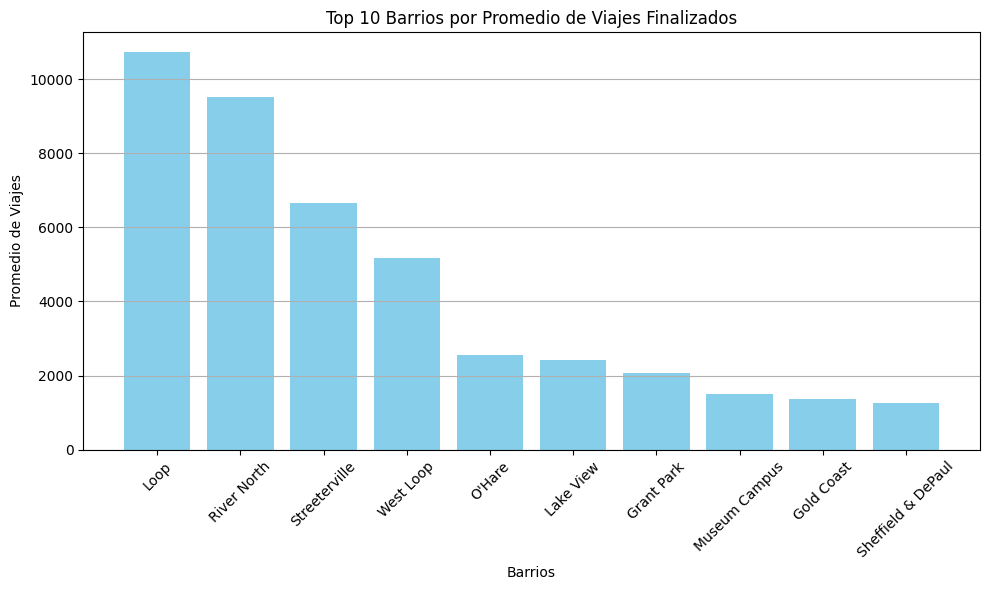

In [35]:
dropoff_sorted = dropoff.sort_values(by='average_trips', ascending=False)

top_10_dropoff = dropoff_sorted.head(10)

print(top_10_dropoff.head)
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.bar(top_10_dropoff['dropoff_location_name'], top_10_dropoff['average_trips'], color='skyblue')
plt.title('Top 10 Barrios por Promedio de Viajes Finalizados')
plt.xlabel('Barrios')
plt.ylabel('Promedio de Viajes')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

### Concluciones

Derivado de la observación de la gráfica anterior, se observa que los tres principales barrios en los que concluyen los viajes en taxi son:

* Loop - 10,727.46
* River North - 9,523.66
* Streeterville - 6,664.66

## Identificando las principales empresas de taxis con mayores viajes realizados

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299


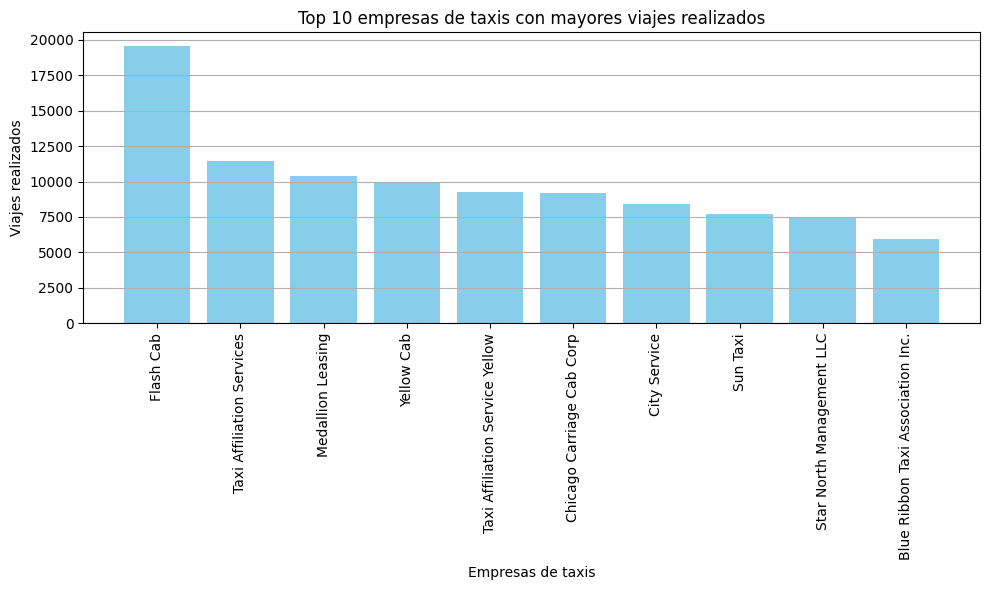

In [36]:
company_trips_sorted = company_trips.sort_values(by='trips_amount', ascending=False)

top_10_company_trips = company_trips_sorted.head(10)
print(top_10_company_trips.head())
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.bar(top_10_company_trips['company_name'], top_10_company_trips['trips_amount'], color='skyblue')
plt.title('Top 10 empresas de taxis con mayores viajes realizados')
plt.xlabel('Empresas de taxis')
plt.ylabel('Viajes realizados')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

### Conclusiones

Observando la gráfica, se concluye que las empresas que registran mayor número de viajes en taxi son las siguientes:

* Flash Cab - 19,558
* Taxi Affiliation Services - 11,422
* Medallion Leasing - 10,367

En gran dominador del mercado se puede considerar Flash Cab, toda vez que existe una ventaja respecto a su más cercano competidor Taxi Affiliation Services, de 8,136 viajes en taxi en los días tomados para este estudio, 15 y 16 de noviembre de 2017.

## Paso 5. Prueba de hipótesis (Python)

Una vez preparados y que tenemos mayor conocimiento de la información observada en las gráficas del numeral anterior, llegamos a la parte más destacada de este análisis, tenemos la tarea de probar la hipótesis "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

A continuación observaremos el dataframe que de Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Recuerda, que cuenta con los siguientes datos:

* start_ts: fecha y hora de la recogida
* weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
* duration_seconds: duración del viaje en segundos

In [37]:

# Filtrar los datos
bad_conditions = loop_trips[loop_trips['weather_conditions'] == 'Bad']['duration_seconds']
good_conditions = loop_trips[loop_trips['weather_conditions'] == 'Good']['duration_seconds']

# Calculando las medias
mean_bad_conditions = bad_conditions.mean()
mean_good_conditions = good_conditions.mean()

#Prueba Levene

statistic, p_value = levene(bad_conditions, good_conditions)

# Mostrar los resultados
print(f'Prueba de Levene: {statistic}')
print(f'Valor p: {p_value}')

# Interpretar los resultados
alpha = 0.05
if p_value > alpha:
    print("No rechazamos la hipótesis nula: las varianzas son iguales.")
else:
    print("Rechazamos la hipótesis nula: las varianzas no son iguales.")
# Realizar el t-test
t_stat, p_value = st.ttest_ind(bad_conditions, good_conditions, equal_var=True)
print()
# Resultados
print(f'Estadístico t: {t_stat}')
print(f'Valor p: {p_value}')
# Interpretación
alpha = 0.05  # Nivel de significancia
if p_value > alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en la duración promedio de los viajes cuando las condiciones del tiempo son malas.")
else:
    print("No rechazamos la hipótesis nula: no hay una diferencia significativa en la duración promedio de los viajes cuando las condiciones del tiempo son malas.")

   
    

Prueba de Levene: 0.000586951625283602
Valor p: 0.9806770360671218
No rechazamos la hipótesis nula: las varianzas son iguales.

Estadístico t: 5.427957689754561
Valor p: 7.397770692813658e-08
No rechazamos la hipótesis nula: no hay una diferencia significativa en la duración promedio de los viajes cuando las condiciones del tiempo son malas.


## Conclusión

Cómo planteaste las hipótesis nula y alternativa

Hipótesis nula
No hay diferencia en la duración promedio de los viajes entre las condiciones climáticas "Bad" y "Good".

Hipótesis Alternativa
La duración promedio de los viajes es mayor cuando las condiciones climáticas son "Bad" en comparación con cuando son "Good".

Criterio utilizado:

La variable dependiente (duration_seconds) es continua y se asume que sigue una distribución normal en cada grupo (Bad y Good).
La variable independiente (weather_conditions) es categórica y tiene dos niveles (Bad y Good).

El principal objetivo de esta prueba es comparar las medias de dos grupos cuando las condiciones climáticas son buenas y malas (Bad vs. Good) para determinar si hay una diferencia significativa en la duración promedio de los viajes.

Para concluir, se observa que existe una variación promedio de 7 minutos en la duración de los viajes en taxi, los días sábados cuando las condiciones del clima son malas; por lo que es correcta "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos", cambia aumentando la duración de los viajes.